In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import roc_curve, precision_recall_curve, mean_squared_error
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

In [ ]:
# Import data
raw_dataset = load_breast_cancer()
raw_X = raw_dataset['data']
raw_y = raw_dataset['target']

In [ ]:
raw_X.shape, raw_y.shape

In [ ]:
feat_norm = MinMaxScaler()
target_1hot = OneHotEncoder()
X = feat_norm.fit_transform(raw_X)


In [ ]:
y = raw_y

In [ ]:
pd.DataFrame(X, columns = raw_dataset['feature_names'])

In [ ]:
print(X.shape, y.shape)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [ ]:
def build_clf(unit=5, optim='adam'):
  # creating the layers of the NN
  ann = tf.keras.models.Sequential()
  ann.add(tf.keras.layers.Dense(units=unit, activation='relu'))
  ann.add(tf.keras.layers.Dense(units=unit, activation='relu'))
  ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
  ann.compile(optimizer = optim, loss = 'binary_crossentropy', metrics = ['accuracy'])
  return ann

In [ ]:
model = KerasClassifier(build_fn=build_clf)

In [ ]:
param_grid = {'unit': [5, 20, 15, 20], 
            'optim': ['adam', 'SGD']}

In [ ]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, return_train_score=True)

In [ ]:
grid_search.fit(X_train, y_train)

In [ ]:
best_params=grid_search.best_params_
accuracy=grid_search.best_score_

In [ ]:
best_params

In [ ]:
accuracy

In [26]:
y_predicted = grid_search.predict(X_test)

8/8 [==============================] - 0s 1ms/step


In [27]:
y_predicted

array([[1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [30]:
from sklearn.metrics import roc_curve 

fpr, tpr, thresholds = roc_curve(y_test, y_predicted)

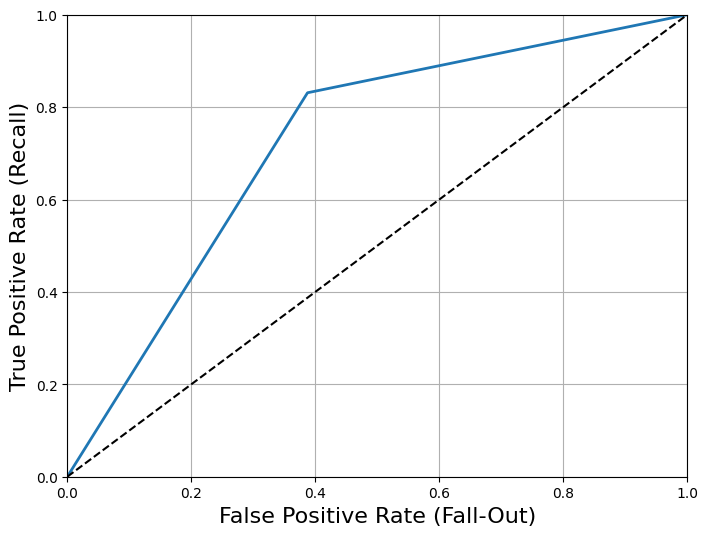

In [31]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr, tpr)
# fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           # Not shown
# plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   # Not shown
# plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  # Not shown
# plt.plot([fpr_90], [recall_90_precision], "ro")               # Not shown
# save_fig("roc_curve_plot")                                    # Not shown
plt.show()